# Which are the States with the most natural disasters in the US?


What is my question:

-what kind of natural disasters exist in USA (fires, floods, tornados, mudslides, earthquakes, hurricanes etc)? Which ones are more frequent?

-Are those areas populated?

-If there is a type of a catastrophe that is a repeated phenomenon in a certain area / state? In that case, should there be state indemnity to compensate the losses of the local citizens? Should taxpayes pay for repeated catastrophic risks to people who insist living in an environment that they know for certain it will be destroyed?

I created my own dataset. Although I checked for official statistics, at Disasters | Data.gov, the available datasets were not clear and when I tried to open the pdf's, I got always the message: "Access denied". I emailed the Agency but so far, I have no answer.

Then I contacted the Federal Emergency Management Agency where they gave me access to the database: "Disaster declaration". Μy first thought was to scrape the pages but soon I realized that some terms were unknown to me. For instance, fires are categorized, some have a cetain type and name, hurricanes have names and so on, so not clear which values go where to the pandas dataframe. Due to time considerations, I thought to limit my research only to the natural disasters DECLARED in 2018 and fall 2017. I ended up with 102 entries.
While building the database, I had to search / google for the event in order to understand the type of disaster as in several cases the event is written in the examined database in the following manner: ex. Arizona 89 East Fire. Moreover, in some cases there were some numbers that I could not identify if it was a code for the state or the type of the disaster (ex. Texas 335 Fire (FM-5234)

One should be carefull because some events happened in 2015 but "declared" (term used by the Agency) much later -months, or even years as it is the case for Alaska-.

From the available findings, it seems that California has the most "natural disasters" and more specifically fires. Fire is also the most common type of disaster in USA for 2018 and part of 2017. 

It would have been nice to add the hectars that were destroyed and any sort of casualties for every disaster, as well as, the specific area in order to put it in a map.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
#type(pd.read_csv("Natural_Disasters_in_USA.csv"))

In [3]:
df = pd.read_csv("Natural_Disasters_in_USA.csv", encoding='utf8', delimiter=',')

In [4]:
df.dtypes

Type_of_disaster    object
Region              object
Month               object
Year                object
Type_incident       object
dtype: object

In [78]:
df

,Type_of_disaster,Region,Month,Year,Type_incident
0,Fire,California,July,2018,Holiday Fire
1,Fire,California,July,2018,West Fire
2,Storm,Texas,June,2018,Severe Storm
3,Flooding,Texas,June,2018,Flooding
4,Fire,California,July,2018,Klamathon fire
5,Fire,Colorado Lake,July,2018,Christine fire
6,Storm,Maryland,May,2018,Severe Storm
7,Flooding,Maryland,May,2018,Flooding
8,Fire,Utah,July,2018,Dollarl Ridge Fire
9,Fire,Colorado,June,2018,Chateau fire


In [6]:
small_df = df.head()
small_df

,Type_of_disaster,Region,Month,Year,Type_incident
0,Fire,California,July,2018,Holiday Fire
1,Fire,California,July,2018,West Fire
2,Storm,Texas,June,2018,Severe Storm
3,Flooding,Texas,June,2018,Flooding
4,Fire,California,July,2018,Klamathon fire


In [8]:
df.Region.value_counts()

California                  15
Kentucky                     9
Hawaii                       6
Texas                        6
New Hampshire                5
Oklahoma                     4
West Virginia                4
Maryland                     4
Maine                        4
Alabama                      3
Ohio                         3
Kansas                       3
American Samoa               2
New Mexico                   2
Nebraska                     2
Colorado                     2
New Jersey                   2
Massachusetts                2
Arizona                      2
Oregon                       2
Indiana                      2
North Carolina               2
Pueblo of Acoma              2
Vermont                      2
Northern Mariana Islands     1
Colorado Lake                1
Hampshire                    1
Utah                         1
New York                     1
Alaska                       1
December                     1
Wyoming                      1
South Da

Text(0.5,1,'State with the most disasters in USA')

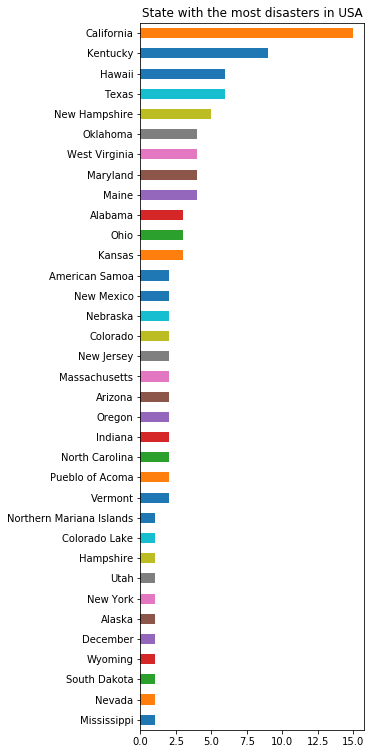

In [82]:
#California is the state that appears most of the times
df.Region.value_counts(ascending=True).plot(kind='barh',figsize=(4,13))
ca = df.Region.value_counts(ascending=True).plot(kind='barh',figsize=(4,13))
ca.set_title("State with the most disasters in USA")

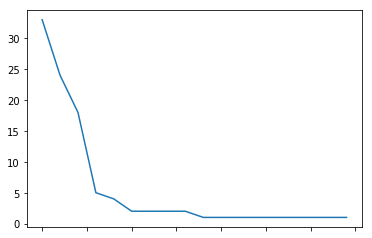

In [75]:
#this type of graphic is not good since I do not have a column with "count", so I can not create an x&y axis.
df.Type_of_disaster.value_counts().plot()

In [76]:
#idea to add the "count" as a separate column in order to have some numerical data
#but, then I had to merge it with the original dataframe
new_table=df.Region.value_counts().reset_index(name = 'Count_of_disasters_per_region')

In [77]:
new_table

,index,Count_of_disasters_per_region
0,California,15
1,Kentucky,9
2,Hawaii,6
3,Texas,6
4,New Hampshire,5
5,Oklahoma,4
6,West Virginia,4
7,Maryland,4
8,Maine,4
9,Alabama,3


In [ ]:
#df['Count_of_disasters_per_region'] = 

In [11]:
df.Type_incident.value_counts()

Flooding                18
Severe storm            14
Wildfire                12
Fire                     7
Severe storm             3
Mudslides                3
Landslides               3
Tornadoes                2
Tropical storm Gita      2
Creek fire               2
Severe winter storm      2
Graham fire              2
Landslide                2
Severe Storm             2
Snowstorm                2
Severe winter storm      2
Hurricane                2
Mudslide                 2
Tornado                  1
Straight-line winds      1
Tinder Fire              1
Mudflows                 1
Christine fire           1
Spring creek fire        1
Holiday Fire             1
Pawnee fire              1
Volcanic eraption        1
Klamathon fire           1
Typhoon Soudelor         1
Earthquake               1
West Fire                1
Straight line winds      1
Soldier Canyon fire      1
Chateau fire             1
Dollarl Ridge Fire       1
Debris flows             1
Name: Type_incident, dtype: 

In [84]:
df.Type_of_disaster.value_counts()

Fire                   33
Storm                  24
Flooding               18
Landslides              5
Mudslides               4
Snowstorm               2
Hurricane               2
Straight-line winds     2
Tornadoes               2
Mudflows                1
Typhoon                 1
Storm New               1
Mudslide                1
Earthquake              1
Tornado                 1
Debris flows            1
Storm Alaska            1
Volcanic eraption       1
Name: Type_of_disaster, dtype: int64

Text(0.5,1,'Most common physical disasters in USA')

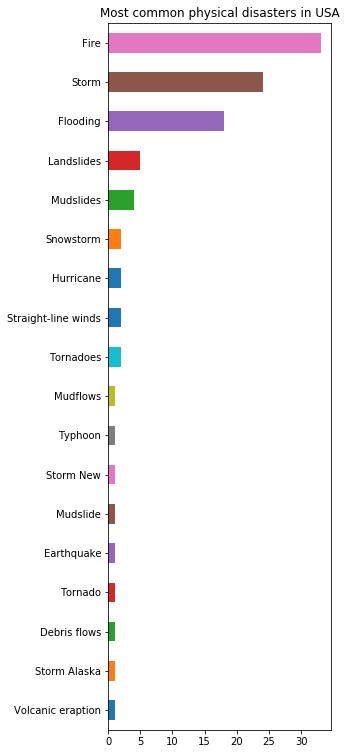

In [85]:
df.Type_of_disaster.value_counts(ascending=True).plot(kind='barh',figsize=(4,13))
dis = df.Type_of_disaster.value_counts(ascending=True).plot(kind='barh',figsize=(4,13))
dis.set_title("Most common physical disasters in USA")

In [52]:
#ταξινομώ σύμφωνα με την περιοχή
df.sort_values(by='Region')

,Type_of_disaster,Region,Month,Year,Type_incident
96,Hurricane,Alabama,October,2017,Hurricane
48,Storm,Alabama,March,2018,Severe storm
49,Tornadoes,Alabama,March,2018,Tornadoes
87,Storm,Alaska,September,2017,Severe storm
72,Storm,American Samoa,February,2018,Tropical storm Gita
73,Storm,American Samoa,February,2018,Tropical storm Gita
35,Fire,Arizona,May,2018,Wildfire
47,Fire,Arizona,April,2018,Tinder Fire
0,Fire,California,July,2018,Holiday Fire
80,Fire,California,December,2017,Wildfire


In [21]:
#check what is different when I put "ascending=False"
df.sort_values(by='Type_of_disaster').plot

In [55]:
#hist, not the appropriate form when non numerical values
df.sort_values(by='Type_of_disaster').hist

<bound method hist_frame of        Type_of_disaster                    Region      Month          Year  \
83         Debris flows                California   December          2017   
37           Earthquake                    Hawaii        May          2018   
0                  Fire                California       July          2018   
20                 Fire                    Oregon       June          2018   
21                 Fire                    Oregon       June          2018   
46                 Fire                     Texas        May          2018   
23                 Fire                   Wyoming       June          2018   
80                 Fire                California   December          2017   
71                 Fire                  Oklahoma      March          2018   
31                 Fire                New Mexico       June          2018   
32                 Fire                New Mexico        May          2018   
65                 Fire             

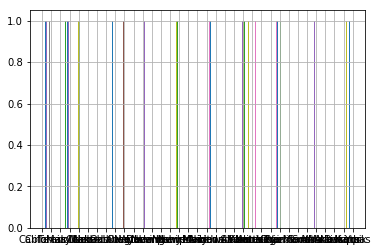

In [23]:
#maybe not the right type of graph without numerical values
df.Region.hist()

In [ ]:
figsize=(4,13)

In [61]:
df.groupby('Region').Type_of_disaster.value_counts(ascending=False).sort_values(ascending=False)

Region                    Type_of_disaster   
California                Fire                   12
Texas                     Fire                    4
Oklahoma                  Fire                    4
Maine                     Flooding                2
New Hampshire             Storm                   2
Kentucky                  Storm                   2
New Hampshire             Flooding                2
Oregon                    Fire                    2
Kentucky                  Flooding                2
Colorado                  Fire                    2
Kentucky                  Landslides              2
                          Mudslides               2
Arizona                   Fire                    2
American Samoa            Storm                   2
Maryland                  Storm                   2
                          Flooding                2
Maine                     Storm                   2
New Mexico                Fire                    2
Hawaii            

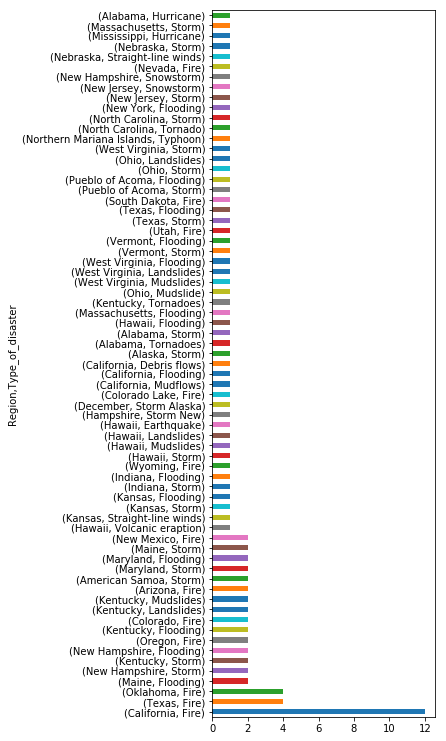

In [62]:
#df.groupby('Region').Type_of_disaster.value_counts().sort_values(ascending=True,na_position='first').plot(x='Region', y='Type_of_disaster', kind='barh',figsize=(4,13))
df.groupby('Region').Type_of_disaster.value_counts(ascending=False).sort_values(ascending=False).plot(x='Region', y='Type_of_disaster', kind='barh',figsize=(4,13))

Text(0.5,1,'Region with the most disasters in USA')

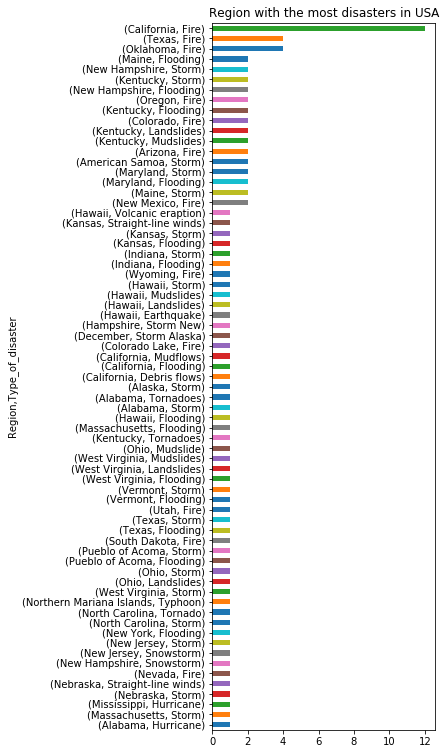

In [66]:
#more complicated way
ax = df.groupby('Region').Type_of_disaster.value_counts().sort_values(ascending=True,na_position='first').plot(x='Region', y='Type_of_disaster', kind='barh',figsize=(4,13))
ax.set_title("Region with the most disasters in USA")

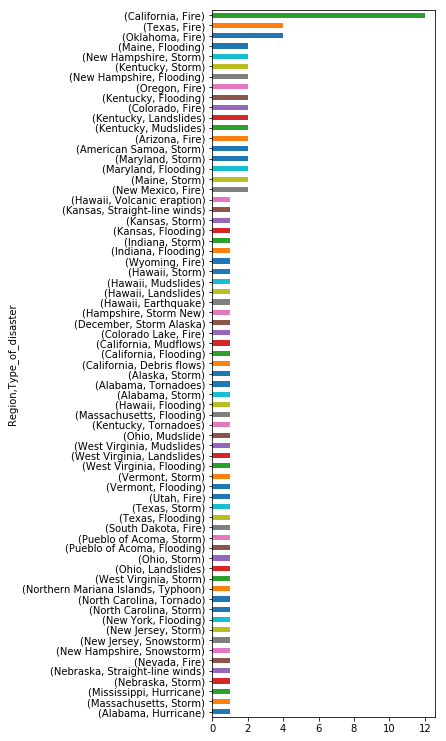

In [64]:
df.groupby('Region').Type_of_disaster.value_counts().sort_values(ascending=True,na_position='first').plot(x='Region', y='Type_of_disaster', kind='barh',figsize=(4,13))

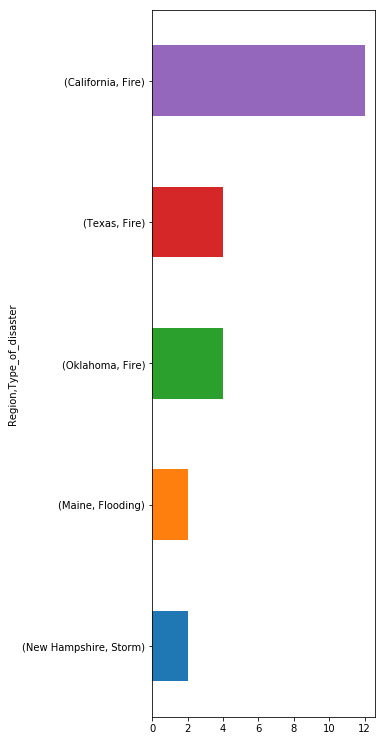

In [69]:
df.groupby('Region').Type_of_disaster.value_counts().sort_values(ascending=True,na_position='first').tail(5).plot(x='Region', y='Type_of_disaster', kind='barh',figsize=(4,13))

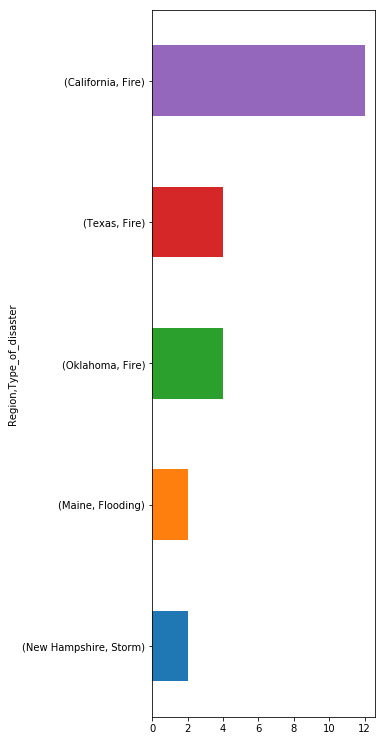

In [56]:
df.groupby('Region').Type_of_disaster.value_counts().sort_values(ascending=True,na_position='first').tail(5).plot(x='Region', y='Type_of_disaster', kind='barh',figsize=(4,13))

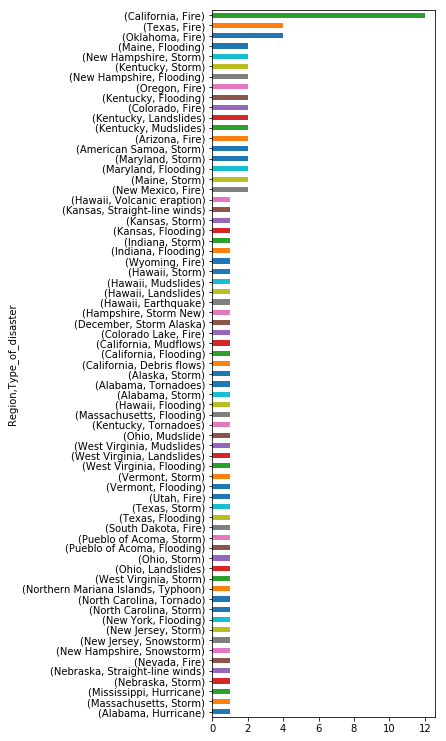

In [51]:
df.groupby('Region').Type_of_disaster.value_counts().sort_values(ascending=True,na_position='first').plot(x='Region', y='Type_of_disaster', kind='barh',figsize=(4,13))

In [39]:
df.groupby('Region').Type_incident.value_counts()

Region                    Type_incident      
Alabama                   Hurricane              1
                          Severe storm           1
                          Tornadoes              1
Alaska                    Severe storm           1
American Samoa            Tropical storm Gita    2
Arizona                   Tinder Fire            1
                          Wildfire               1
California                Wildfire               7
                          Creek fire             1
                          Debris flows           1
                          Flooding               1
                          Holiday Fire           1
                          Klamathon fire         1
                          Mudflows               1
                          Pawnee fire            1
                          West Fire              1
Colorado                  Chateau fire           1
                          Spring creek fire      1
Colorado Lake             Christine 

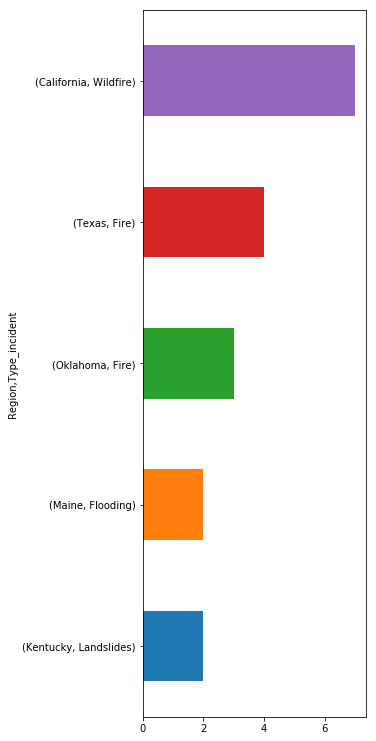

In [47]:
df.groupby('Region').Type_incident.value_counts().sort_values(ascending=True,na_position='first').tail(5).plot(x='Region', y='Type_incident', kind='barh',figsize=(4,13))

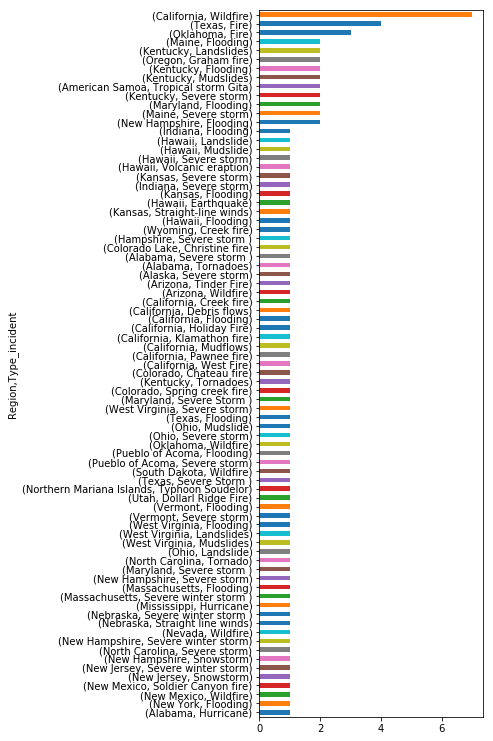

In [48]:
df.groupby('Region').Type_incident.value_counts().sort_values(ascending=True,na_position='first').plot(x='Region', y='Type_incident', kind='barh',figsize=(4,13))

In [ ]:
#plot(x='Region', y=df.Type_of_disaster.value_counts(), kind='barh',figsize=(4,13))

In [ ]:
small_df

In [ ]:
df.groupby('Region').Type_of_disaster.value_counts().sort_values(ascending=True,na_position='first').plot(x='Region', y='Type_of_disaster', kind='barh',figsize=(4,13))